In [4]:
from matplotlib import pyplot as plt
import numpy as np
from pyspark import SparkConf, SparkContext
from algorithms.GreedySubmodular import GreedySubmodular
from time import time
import findspark
import pandas as pd

np.random.seed(56)
findspark.init()

# k
k = 3
minlim = 0
maxlim = 100

def generate_dataset(size):
    # points
    coords_x = np.random.randint(minlim, maxlim, size)
    coords_y = np.random.randint(minlim, maxlim, size)
    return coords_x, coords_y

def plot(balls, points, num_balls, size):
    colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(balls)))
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(f'Max cover set k = {k}, balls = {num_balls}, n = {size},')
    plt.xlim(minlim, maxlim)
    plt.ylim(minlim, maxlim)

    for i, (x, y, r) in enumerate(balls):
        circle = plt.Circle((x, y), r, color=colors[i])
        ax.add_patch(circle)

    x, y = zip(*points)
    ax.scatter(x, y)
    plt.show()

In [2]:
timings = []
# timings = []
# sizes = []
conf = SparkConf('local[]').setAppName('GreedySubmodular')
sc = SparkContext.getOrCreate(conf=conf)

for i in range(50):
    # x, y, r
    balls = set[tuple[int, int, int]]([(1, 3, 4), (50, 50, 10), (8, 3, 5), (20, 3, 5), (20, 70, 5), (70, 20, 10), (30, 40, 15), (10, 80, 30)])
    num_balls = len(balls)

    i = i + 1
    size = i * 500 
    coords_x, coords_y = generate_dataset(size)
    # plot(balls, list(zip(coords_x, coords_y)), num_balls, size)

    # algorithm
    alg = GreedySubmodular(sc, coords_x, coords_y)
    t0 = time()
    O_balls, O_points = alg.run(k, balls)
    t1 = time()
    timings.append({ 'size': size, 'timing': t1 - t0 })
    # timings.append(t1 - t0)
    # sizes.append(size)
    print(f'timing = {t1 - t0}')

    # plot(O_balls, O_points, num_balls, size)
df = pd.DataFrame(timings)
df.to_csv('timings.csv')

final max_ball: ((20, 70, 5), (8, {(np.int32(24), np.int32(72)), (np.int32(16), np.int32(73)), (np.int32(17), np.int32(67)), (np.int32(20), np.int32(74)), (np.int32(19), np.int32(70)), (np.int32(21), np.int32(69)), (np.int32(22), np.int32(74)), (np.int32(23), np.int32(66))}))
final max_ball: ((50, 50, 10), (12, {(np.int32(43), np.int32(43)), (np.int32(57), np.int32(55)), (np.int32(48), np.int32(52)), (np.int32(44), np.int32(48)), (np.int32(56), np.int32(48)), (np.int32(46), np.int32(54)), (np.int32(49), np.int32(50)), (np.int32(48), np.int32(48)), (np.int32(44), np.int32(56)), (np.int32(47), np.int32(47)), (np.int32(50), np.int32(53)), (np.int32(54), np.int32(46))}))
timing = 50.01309847831726
final max_ball: ((50, 50, 10), (31, {(np.int32(50), np.int32(49)), (np.int32(41), np.int32(46)), (np.int32(52), np.int32(55)), (np.int32(45), np.int32(43)), (np.int32(53), np.int32(56)), (np.int32(47), np.int32(46)), (np.int32(56), np.int32(58)), (np.int32(55), np.int32(56)), (np.int32(53), np.in

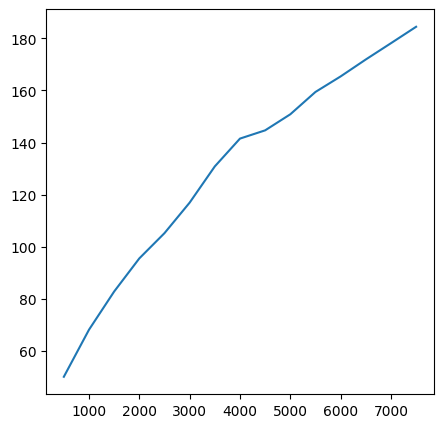

In [3]:
# plot performance graph
fig = plt.figure(figsize=(5, 5))

plt.plot(df['size'], df['timing'])